In [1]:
'''
PROTEIN GRAPH CONSTRUCTOR PROGRAM
Last modified 22-10-16 by Robert Heeter
'''

import os
import numpy as np
import matplotlib.pyplot as plt
import time

import ipywidgets as widget
%matplotlib widget

# IMPORTING FUNCTIONS

from ipynb.fs.full.pgn_import import *
from ipynb.fs.full.pgn_build2 import *
from ipynb.fs.full.pgn_export import *
from ipynb.fs.full.pgn_plot import *


In [2]:
# PROTEIN GRAPH CONSTRUCTOR: PROGRAM PARAMETERS

# ligplot_program_path = path to LigPlot program
ligplot_program_path = "/Users/rcheeter/Desktop/LigPlus/lib/exe_mac64"

# ligplot_prm_file_path = path to LigPlot .prm file
ligplot_prm_file_path = "/Users/rcheeter/Desktop/LigPlus/lib/params/ligplot.prm"

# het_group_dictionary_file_path = path to Het Group Dictionary .cif file
het_group_dictionary_file_path = ''
# het_group_dictionary_file_path = "/Users/rcheeter/Desktop/LigPlus/lib/params/components.cif"

# hbplus_params = 4 float parameters for hbplus thresholds
hbplus_params = [2.70, 3.35, 2.90, 3.90]

# pdb_url = PDB url to download .pdb file, with 'XXXX' in place of 4-character PDB code
pdb_url = "http://files.rcsb.org/download/XXXX.pdb"

# pdb_input = input [XXXX] PDB code (if using url) or file path ending in [/XXXX[...].pdb]
# pdb_input = '4wkq'
# pdb_input = '/Users/rcheeter/Desktop/4wkq_target.B99990004-2.pdb'
# pdb_input = '/Users/rcheeter/Desktop/test-gly.pdb'
pdb_input = '4wkq'

# hetatm_name_list = list of all target HETATM residues, with structure RESIDUE_NAME-CHAIN_ID, i.e. IRE-A
hetatm_name_list = []

# output_path = path to output folder
output_path = "/Users/rcheeter/Desktop/TESTING_RUN"


In [3]:
# PROTEIN GRAPH CONSTRUCTOR: MAIN
print('\n[PROTEIN GRAPH CONSTRUCTOR PROGRAM by Robert Heeter]')

# IMPORT

start = time.time()

pdb_file_path,hetatm_name_list = get_pdb(pdb_input,pdb_url,output_path)
# pdb_file_path = format_pdb(pdb_file_path,output_path)

print(hetatm_name_list)
hetatm_name_list = ['IRE-A']

ligplot_hhb_list = []
ligplot_nnb_list = []
hbadd_bonds_list = []

for hetatm_name in hetatm_name_list:
    ligplot_hhb_file_path,ligplot_nnb_file_path,hbadd_bonds_file_path = get_ligplot(pdb_file_path,hetatm_name,ligplot_program_path,ligplot_prm_file_path,
                                                                                    het_group_dictionary_file_path,hbplus_params,output_path)
    ligplot_hhb = format_ligplot(ligplot_hhb_file_path,hetatm_name)
    ligplot_nnb = format_ligplot(ligplot_nnb_file_path,hetatm_name)
    hbadd_bonds = format_ligplot(hbadd_bonds_file_path,hetatm_name)

    ligplot_hhb_list.append(ligplot_hhb)
    ligplot_nnb_list.append(ligplot_nnb)
    hbadd_bonds_list.append(hbadd_bonds)
    
    
    
    
# BUILD
    
atom_list = make_atom_list2(pdb_file_path,hetatm_name_list)

dist_matrix = make_distance_matrix(atom_list)

conn_matrix = make_connection_matrix(atom_list)
conn_matrix = fill_protein_bonds(conn_matrix,atom_list)
for ligplot_hhb in ligplot_hhb_list:
    conn_matrix = fill_ligand_bonds(conn_matrix,atom_list,ligplot_hhb)
for ligplot_nnb in ligplot_nnb_list:
    conn_matrix = fill_ligand_bonds(conn_matrix,atom_list,ligplot_nnb)
for hbadd_bonds in hbadd_bonds_list:
    conn_matrix = fill_ligand_bonds(conn_matrix,atom_list,hbadd_bonds)

bond_list = make_bond_list(conn_matrix,atom_list,dist_matrix)

print(f'\nRUNTIME: {np.round((time.time() - start),4)}s')





# EXPORT

start = time.time()

export_atom_list(atom_list,output_path)
export_distance_matrix(dist_matrix,output_path)
export_connection_matrix(conn_matrix,output_path)
export_bond_list(bond_list,output_path)

print(f'\nSAVETIME: {np.round((time.time() - start),4)}s')



[PROTEIN GRAPH NETWORK PROGRAM by Robert Heeter]

[running get_pdb for [4wkq]]
● NOTE: saving PDB file to output path: [/Users/rcheeter/Desktop/TESTING_RUN/4wkq.pdb]

● NOTE: set of non-protein HETATM molecules: [CSX-A (#797), MES-A (#1103), NA-A (#1102), IRE-A (#1101)], with [121] water molecules
['MES-A', 'IRE-A', 'NA-A', 'HOH-A', 'CSX-A']

[running get_ligplot for [IRE-A]]
● WARNING: cannot find Het Group Dictionary .cif file: []; running without Het Group Dictionary

■■■■■■■■■■■■■■■■■■■■■■■■

  Opening PDB file [/Users/rcheeter/Desktop/TESTING_RUN/LigPlot-IRE-A/hbadd_input.pdb] ...

    Searching for HET groups in PDB file ...

      Number of HET residues read in        =       1
      Number of atom records stored         =      31
      Number of CONECT details stored       =       0

  Opening HET Group Dictionary ...

*** Unable to open HET Group Dictionary [-wkdir]
    Generating fake HBPLUS entry from PDB file for residue type [IRE]


  Opening HBPLUS input file, hbplus.rc 

In [4]:
# PROTEIN GRAPH CONSTRUCTOR: VISUALIZER PARAMETERS

plot_B_atoms = True # toggles whether atom types are plotted
plot_R_atoms = True
plot_H_atoms = True
plot_W_atoms = True

bond_linewidth = 0.8 # sets line width
bond_style = 'solid' # sets line style

atom_size = 0.8 # sets point size
atom_style = '.' # sets point style

plot_params = [plot_B_atoms,plot_R_atoms,plot_H_atoms,plot_W_atoms]
bond_params = [bond_linewidth,bond_style]
atom_params = [atom_size,atom_style]



[running make_plot]

PLOTTIME: 4.2976s


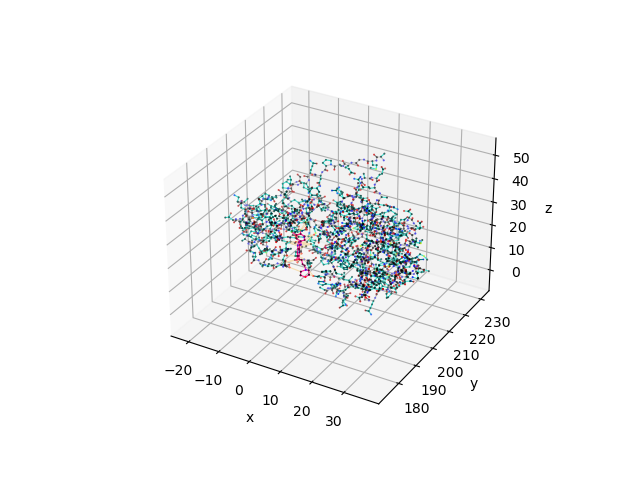

In [7]:
# PROTEIN GRAPH CONSTRUCTOR: VISUALIZER

start = time.time()

make_plot(bond_list,atom_list,atom_params,bond_params,plot_params)
plt.savefig(f"{output_path}/testplot.png",dpi=800)

print(f'\nPLOTTIME: {np.round((time.time() - start),4)}s')
